![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [40]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

A partir de la información suministrada en la página web sobre los datos y alguna información adicional del notebook, se logra concluir los siguiente sobre el total de bicicletas alquiladas durante las estaciones del año: 

* Invierno (1): El promedio de bicicletas rentadas es aproximadamente 116.34. Es la temporada con la demanda más baja, lo cual es esperable dado el clima más frío y posiblemente condiciones climáticas adversas que desalientan el uso de bicicletas.

* Primavera (2): El promedio aumenta a 215.25. La llegada del clima más cálido y el florecimiento de la naturaleza pueden motivar a más personas a rentar bicicletas, ya sea para recreación o como medio de transporte.

* Verano (3): El verano muestra el promedio más alto de bicicletas rentadas con 234.42. Esto es consistente con lo que se esperaría, ya que el clima veraniego y las vacaciones escolares pueden incrementar significativamente la actividad recreativa y el turismo, potenciando el uso de bicicletas.

* Otoño (4): El promedio disminuye ligeramente a 198.99, pero aún se mantiene relativamente alto en comparación con el invierno y la primavera. Esto podría reflejar un clima todavía agradable y la belleza de los paisajes otoñales que aún animan a las personas a utilizar bicicletas.

In [41]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


Estos resultados muestran el promedio de bicicletas rentadas por hora del día, este es el análisis de los datos:

* Horas de la Madrugada (0 a 5): La demanda es baja, lo que es esperado ya que la mayoría de las personas están en casa durante estas horas. La demanda alcanza su punto más bajo alrededor de las 4 a.m.

* Horas de la Mañana (6 a 9): Hay un aumento significativo en la demanda, especialmente durante las horas pico de desplazamiento matutino a las 7 y 8 a.m., se muestra un uso intensivo de bicicletas para el traslado al trabajo o la escuela.

* Mediodía y Primeras Horas de la Tarde (10 a 15): La demanda se mantiene estable, con un ligero pico al mediodía. Esto podría reflejar tanto el uso recreativo como los desplazamientos de mediodía o temprano en la tarde.

* Tarde (16 a 19): Se observa un pico pronunciado en la demanda durante las horas de regreso del trabajo, siendo las 17 y 18 horas los momentos de mayor demanda del día. Esto subraya la importancia de las bicicletas como medio de transporte para el regreso a casa después del trabajo.

* Noche (20 a 23): La demanda comienza a disminuir después de las 19 horas, pero se mantiene moderadamente alta hasta alrededor de las 21 horas, disminuyendo más significativamente después de esa hora hasta alcanzar niveles más bajos hacia medianoche.

Este patrón muestra un uso típico del transporte en áreas urbanas, con picos claros durante las horas de inicio y fin de la jornada laboral, indicando una fuerte dependencia del alquiler de bicicletas para los desplazamientos diarios. Además, el uso constante durante el mediodía y las primeras horas de la tarde puede indicar tanto desplazamientos como actividades recreativas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

Text(0.5, 1.0, 'total')

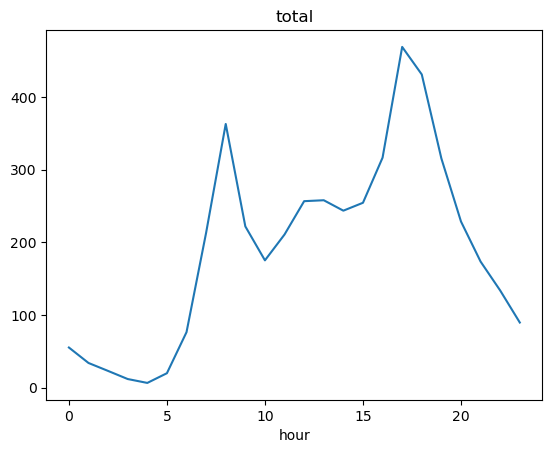

In [42]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()
plt.title('total')

Text(0.5, 1.0, 'invierno')

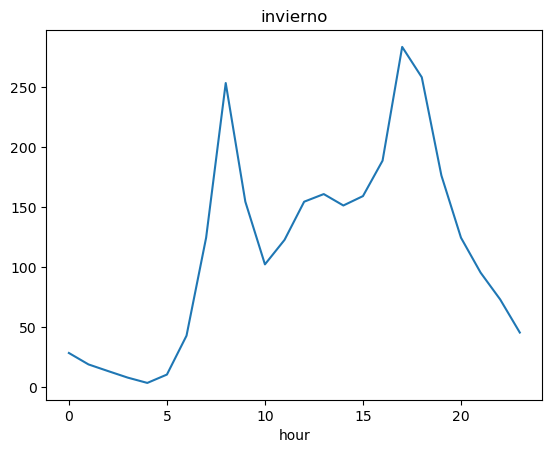

In [43]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season']==1].groupby('hour').total.mean().plot()
plt.title('invierno')

Text(0.5, 1.0, 'verano')

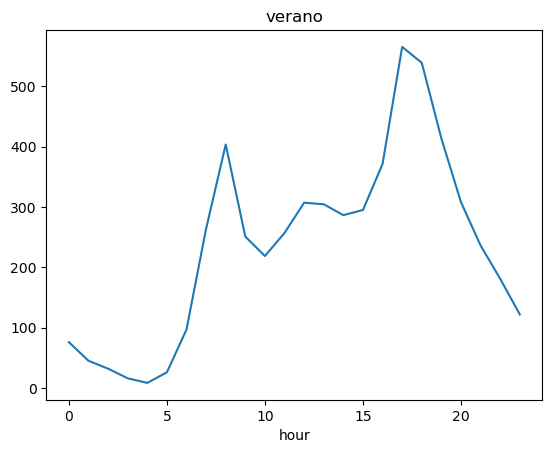

In [44]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season']==3].groupby('hour').total.mean().plot()
plt.title('verano')

#### Gráfico General (Todo el Año):
* Se observan dos picos pronunciados durante las horas del día: uno en la mañana alrededor de las 8 a.m. y otro en la tarde-noche alrededor de las 6 p.m. Esto es característico de los patrones de desplazamiento laboral y escolar.
* Hay un valle notable en el mediodía, después de las 9 a.m., lo que sugiere una disminución en la actividad de alquiler de bicicletas durante las horas de trabajo o escolares.
* La demanda se mantiene estable y más baja durante las primeras horas de la mañana y comienza a aumentar significativamente a partir de las 5 a.m., alcanzando el primer pico de la mañana.

#### Gráfico de Invierno:
* La tendencia general sigue el mismo patrón de dos picos, pero con una magnitud menor comparada con el gráfico general, lo que refleja la reducción en la actividad de alquiler de bicicletas durante el invierno, probablemente debido al clima más frío.
* La caída en la demanda después de las horas pico de la mañana es más pronunciada que en el gráfico general, posiblemente debido a la menor inclinación a realizar actividades al aire libre en invierno.
* El pico de la tarde es menos marcado que en el gráfico general, lo que podría indicar que menos personas utilizan bicicletas para regresar a sus hogares en la noche durante el invierno por las bajas temperaturas.

#### Gráfico de Verano:
* En comparación con el invierno, los picos de la mañana y la tarde son más altos, lo que indica una mayor preferencia por el uso de bicicletas en climas cálidos.
* El valle del mediodía es menos pronunciado que en invierno, lo que podría sugerir que más personas eligen utilizar bicicletas durante el día en el verano, quizás para actividades recreativas además de la movilidad.
* La demanda durante el verano es más alta por la noche en comparación con el invierno, lo que puede ser el resultado de temperaturas más agradables y días más largos.

#### Interpretación General:
* Los patrones de alquiler de bicicletas cambian según la estación, con más actividad durante el verano y menos en invierno.
* Los picos en las horas de desplazamiento sugieren que las bicicletas son una opción popular para ir y volver del trabajo o la escuela.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

RMSE 160.13875579927017
MAE 118.94195942411858


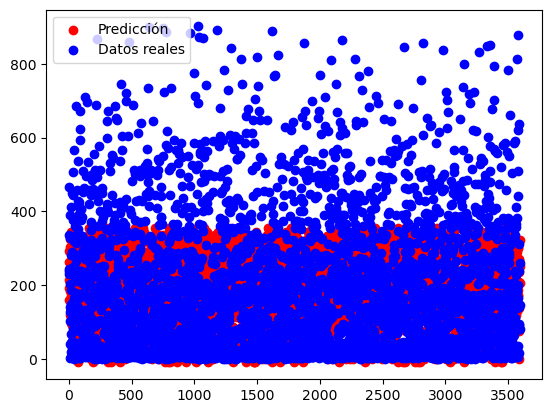

In [49]:
# Celda 3
XTotal = bikes[['season', 'hour']]

dummies = pd.get_dummies(XTotal['season'], drop_first=True, prefix='season').astype(int)

# Ahora, unimos las variables dummy al DataFrame original
XTotal_modificado = pd.concat([XTotal, dummies], axis=1)

# Opcionalmente, puedes eliminar la columna original 'categoria' si ya no la necesitas
XTotal_modificado.drop('season', axis=1, inplace=True)

yTotal = bikes[['total']].values
XTotal_modificado = XTotal_modificado.values
XTotal_modificado

XTrain, XTest, yTrain, yTest = train_test_split(XTotal_modificado, yTotal, test_size=0.33, random_state=0)
LR = LinearRegression()
LRmodel = LR.fit(XTrain, yTrain)
prediccionLR=LRmodel.predict(XTest)

RMSELR = np.sqrt(np.average(np.square(prediccionLR - yTest)))
MAELR = np.average(np.abs(prediccionLR-yTest))
print('RMSE', RMSELR)
print('MAE', MAELR)

plt.scatter(np.linspace(0,len(prediccionLR), len(prediccionLR)), prediccionLR, color= 'red', label='Predicción')
plt.scatter(np.linspace(0,len(yTest), len(yTest)), yTest, color= 'blue', label='Datos reales')
plt.legend(loc='best')

#### Interpretación de coeficientes:
* El RMSE arroja un valor de 160.14 y un MAE de 118.94, lo que indica un error significativo en la predicción dada la magnitud de la variable objetivo. 
* La diferencia entre el RMSE y el MAE sugiere que el módelo no está captando de buena forma los valores que son atípicos dentro del set de datos (esto es apreciable en el gráfico mostrado), lo cual es una caracteristica normal dentro de los modelos de regresión lineal.

#### Limitaciones del Modelo:
* La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. En muchos casos reales, como en la demanda de bicicletas, la relación podría no ser estrictamente lineal. Por ejemplo, podría haber horas pico de demanda que un modelo lineal no pueda capturar adecuadamente.
* Un modelo lineal básico no captura las interacciones a menos que se añadan explícitamente como términos de interacción.
* La regresión lineal puede ser afectada por outliers o puntos de datos anómalos que pueden distorsionar los resultados y las interpretaciones de los coeficientes.
* Los modelos lineales también asumen homocedasticidad, es decir, que la varianza de los errores es constante a través de las predicciones. Si la variabilidad de 'total' cambia significativamente a través de diferentes 'seasons' o 'hours', esto puede violar la suposición y afectar el rendimiento del modelo.



### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4
def mse(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.mean((y - y.mean())**2)

def mse_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y[filter_l]
    y_r = y[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    mse_total = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)
    
    weighted_mse = (n_l / (n_l + n_r) * mse_l) + (n_r / (n_l + n_r) * mse_r)
    
    return mse_total - weighted_mse

# La función best_split permanece bastante similar, pero cambiamos la llamada a gini_impurity por mse_impurity
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = mse_impurity(X[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X[:, j] < split
    X_l, y_l = X[filter_l], y[filter_l]
    X_r, y_r = X[~filter_l], y[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0]) * tree['y_pred']

    # Revisar si es el nodo final
    if tree['split'] != -1:
        
        j, split = tree['split']
        filter_l = (X[:, j] < split)
        
        if any(filter_l):
            predicted[filter_l] = tree_predict(X[filter_l], tree['sl'])
        if any(~filter_l):
            predicted[~filter_l] = tree_predict(X[~filter_l], tree['sr'])

    return predicted

In [51]:
tree = tree_grow(XTrain, yTrain, level=0, min_gain=0.001, max_depth=7, num_pct=10)
print(tree)

prediction_tree = tree_predict(XTest, tree)
RMSE_tree_manual = np.sqrt(np.average(np.square(prediction_tree - yTest)))
MAE_tree_manual = np.average(np.abs(prediction_tree-yTest))
print('RMSE', RMSE_tree_manual)
print('MAE', MAE_tree_manual)

{'y_pred': 189.627313862608, 'level': 0, 'split': [0, 8.0], 'n_samples': 7293, 'gain': 9234.192546258972, 'sl': {'y_pred': 53.85456039441249, 'level': 1, 'split': [0, 7.0], 'n_samples': 2434, 'gain': 3347.73634976643, 'sl': {'y_pred': 32.450256889304065, 'level': 2, 'split': [0, 6.0], 'n_samples': 2141, 'gain': 301.410353371846, 'sl': {'y_pred': 25.25287356321839, 'level': 3, 'split': [0, 2.0], 'n_samples': 1827, 'gain': 199.48629238477474, 'sl': {'y_pred': 44.8876404494382, 'level': 4, 'split': [0, 1.0], 'n_samples': 623, 'gain': 110.39823203012566, 'sl': {'y_pred': 55.41157556270097, 'level': 5, 'split': [2, 1.0], 'n_samples': 311, 'gain': 130.8579548414143, 'sl': {'y_pred': 48.67965367965368, 'level': 6, 'split': [1, 1.0], 'n_samples': 231, 'gain': 66.18789099068681, 'sl': {'y_pred': 42.644295302013425, 'level': 7, 'split': -1, 'n_samples': 149, 'gain': 257.7568910398038}, 'sr': {'y_pred': 59.646341463414636, 'level': 7, 'split': -1, 'n_samples': 82, 'gain': 0}}, 'sr': {'y_pred': 74

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [55]:
# Celda 5

regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
regressor.fit(XTrain, yTrain)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(XTest)
RMSE_tree_libreria = np.sqrt(np.average(np.square(y_pred - yTest)))
MAE_tree_libreria = np.average(np.abs(y_pred-yTest))
print('RMSE', RMSE_tree_libreria)
print('MAE', MAE_tree_libreria)


RMSE 226.84390558402833
MAE 176.70081931466294


#### Regresión Lineal:
* RMSE: 160.14
* MAE: 118.94
#### Árbol de Decisión:
* RMSE: 226.84
* MAE: 176.70

El modelo de regresión lineal tiene un RMSE y un MAE significativamente menores que el árbol de decisión, lo que indica que, en promedio, las predicciones del modelo de regresión lineal están más cercanas a los valores reales de las rentas de bicicletas. El menor RMSE sugiere que las predicciones del modelo de regresión lineal son más consistentes y hay menos variación en los errores de predicción. De manera similar, un MAE más bajo indica que las desviaciones absolutas promedio de las predicciones a los valores reales son menores en el modelo de regresión lineal.

La conclusión principal aquí es que el modelo de regresión lineal parece ser más adecuado para este conjunto de datos y problema específico que el árbol de decisión. Esto podría deberse a varias razones:

* Complejidad del Modelo: Los árboles de decisión son modelos no lineales y pueden sobreajustarse a los datos de entrenamiento, lo que afecta negativamente su rendimiento en los datos de prueba. Si el árbol de decisión no ha sido podado o no se han ajustado sus hiperparámetros, podría haber aprendido demasiado ruido de los datos de entrenamiento.
* Linealidad de los Datos: Es posible que la relación entre las variables predictoras y la respuesta sea aproximadamente lineal, y por lo tanto, un modelo de regresión lineal captura mejor esta relación.
* Interacción y No Linealidad: Aunque los árboles de decisión pueden capturar interacciones y relaciones no lineales entre las variables
* Sensibilidad a los Datos: Los árboles de decisión pueden ser más sensibles a las variaciones en los datos de entrenamiento, mientras que los modelos de regresión lineal pueden ser más robustos ante pequeñas fluctuaciones.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [14]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [15]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()


0.5

In [32]:
X=X.values
y=y.values

In [33]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [56]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Definir el modelo de árbol de decisión y calibrar max_depth
tree_params = {'max_depth': range(1, 100)}
tree = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_cv.fit(X_train, y_train)

# Mejor parámetro de max_depth
best_depth = tree_cv.best_params_['max_depth']
print(best_depth)

# Entrenar el árbol de decisión con el mejor parámetro encontrado
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree_best.fit(X_train, y_train)

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred_tree = tree_best.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar desempeño: Accuracy y F1-Score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree, average='weighted')

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print('accuracy_tree', accuracy_tree)
print('f1_score_tree', f1_score_tree)
print('accuracy_log_reg', accuracy_log_reg)
print('f1_score_log_reg', f1_score_log_reg)



1
accuracy_tree 0.6453333333333333
f1_score_tree 0.6453289196958572
accuracy_log_reg 0.6133333333333333
f1_score_log_reg 0.61318481531272


#### Precisión (Accuracy)
Árbol de Decisión: 0.6453
Regresión Logística: 0.6133
* La precisión indica el porcentaje de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de casos. El árbol de decisión tiene una precisión aproximadamente 3.2% mayor que la regresión logística, por lo tanto, el árbol de decisión fue mejor para predecir correctamente la clasificación.

#### Puntuación F1 (F1 Score)
Árbol de Decisión: 0.6453
Regresión Logística: 0.6132
* La puntuación F1 es una medida que combina la precisión y la sensibilidad (recall) en un solo valor, ayudando a evaluar el equilibrio entre estas dos métricas. Una puntuación F1 alta indica que el modelo tiene un buen equilibrio entre precisión y sensibilidad. Al igual que con la precisión, el árbol de decisión supera a la regresión logística en la puntuación F1, aunque nuevamente por un margen relativamente pequeño.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [57]:
# Celda 7

from sklearn.ensemble import BaggingClassifier

# Definir los modelos base
tree_depth = DecisionTreeClassifier(max_depth=5, random_state=42)  # Árbol con max_depth
tree_leaf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  # Árbol con min_samples_leaf
log_reg = LogisticRegression(max_iter=200, random_state=42)  # Regresión logística

# Crear ensambles de bagging para cada tipo de modelo
bagged_tree_depth = BaggingClassifier(base_estimator=tree_depth, n_estimators=100, oob_score=True, random_state=42)
bagged_tree_leaf  = BaggingClassifier(base_estimator=tree_leaf, n_estimators=100, oob_score=True, random_state=42)
bagged_log_reg    = BaggingClassifier(base_estimator=log_reg, n_estimators=100, oob_score=True, random_state=42)

# Entrenar los ensambles
bagged_tree_depth.fit(X_train, y_train)
bagged_tree_leaf.fit(X_train, y_train)
bagged_log_reg.fit(X_train, y_train)

# Evaluar cada ensamble
y_pred_bagged_tree_depth = bagged_tree_depth.predict(X_test)
y_pred_bagged_tree_leaf = bagged_tree_leaf.predict(X_test)
y_pred_bagged_log_reg = bagged_log_reg.predict(X_test)

# Métricas de evaluación
accuracy_depth = accuracy_score(y_test, y_pred_bagged_tree_depth)
f1_score_depth = f1_score(y_test, y_pred_bagged_tree_depth)

accuracy_leaf = accuracy_score(y_test, y_pred_bagged_tree_leaf)
f1_score_leaf = f1_score(y_test, y_pred_bagged_tree_leaf)

accuracy_log_reg = accuracy_score(y_test, y_pred_bagged_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_bagged_log_reg)

print('accuracy_depth', accuracy_depth)
print('f1_score_depth', f1_score_depth)
print('accuracy_leaf', accuracy_leaf)
print('f1_score_leaf', f1_score_leaf)
print('accuracy_log_reg', accuracy_log_reg)
print('f1_score_log_reg', f1_score_log_reg)



accuracy_depth 0.6573333333333333
f1_score_depth 0.6573333333333333
accuracy_leaf 0.6573333333333333
f1_score_leaf 0.66005291005291
accuracy_log_reg 0.6166666666666667
f1_score_log_reg 0.6106973595125254


### Árbol de Decisión (Limitado por Profundidad Máxima)
Precisión (Accuracy): 0.6573
Puntuación F1 (F1 Score): 0.6573
* Este modelo muestra un equilibrio exacto entre la precisión y la puntuación F1, lo que indica que tiene un buen balance entre la precisión y la sensibilidad (recall). La limitación de la profundidad máxima probablemente ayuda a prevenir el sobreajuste, permitiendo que el modelo generalice mejor a nuevos datos.

### Árbol de Decisión (Limitado por el Número Mínimo de Muestras por Hoja)
Precisión (Accuracy): 0.6573
Puntuación F1 (F1 Score): 0.6601
* Estos resultados son muy similares a los del árbol limitado por profundidad, lo que sugiere que ambos métodos de regularización son efectivos en este caso. Sin embargo, la puntuación F1 ligeramente superior en este modelo sugiere una pequeña mejora en el balance entre la precisión y la sensibilidad, posiblemente debido a una mejor capacidad para manejar las clases minoritarias o reducir el sobreajuste en hojas específicas.

#### Regresión Logística
Precisión (Accuracy): 0.6167
Puntuación F1 (F1 Score): 0.6107
* La regresión logística muestra tanto una precisión como una puntuación F1 más bajas que las variantes del árbol de decisión. Esto puede deberse a varias razones, como la incapacidad del modelo lineal para capturar relaciones no lineales entre las variables y la variable objetivo. La regresión logística, al ser un modelo más simple, podría no capturar toda la complejidad de los datos.

In [58]:
# Obtener las predicciones directas (votación dura) de cada ensamble
pred_tree_depth = bagged_tree_depth.predict(X_test)
pred_tree_leaf = bagged_tree_leaf.predict(X_test)
pred_log_reg = bagged_log_reg.predict(X_test)

# Combinar las predicciones en una matriz (n_samples, n_models)
combined_predictions = np.vstack((pred_tree_depth, pred_tree_leaf, pred_log_reg)).T

# Realizar la votación mayoritaria para cada muestra
majority_vote_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=combined_predictions)

# Evaluar el ensamble con votación mayoritaria
accuracy_majority_vote = accuracy_score(y_test, majority_vote_predictions)
f1_score_majority_vote = f1_score(y_test, majority_vote_predictions, average='weighted')

print('accuracy_majority_vote', accuracy_majority_vote)
print('f1_score_majority_vote', f1_score_majority_vote)



accuracy_majority_vote 0.6526666666666666
f1_score_majority_vote 0.65266465985096


Precisión (Accuracy): 0.6527
Puntuación F1 (F1 Score): 0.6527

#### Comparación con Modelos Individuales
* La precisión y la puntuación F1 del ensamble están muy cerca de los resultados de los modelos de árbol de decisión individuales y son superiores a los de la regresión logística. Esto indica que el ensamble logra capturar la fortaleza de los modelos individuales, manteniendo un rendimiento general sólido.
* Es notable que el rendimiento del ensamble se encuentre entre los resultados de los modelos individuales, El ensamble mejora la robustez del modelo combinando las predicciones, lo que a menudo lleva a una mejor generalización y un rendimiento más consistente en datos no vistos.
* Los errores cometidos por un modelo podrían ser compensados por los otros modelos en el ensamble, lo que potencialmente lleva a una mejora en el rendimiento. Sin embargo, si todos los modelos tienden a cometer errores en los mismos ejemplos, el ensamble no necesariamente mejora el rendimiento, lo que puede estar sucediendo en este caso.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [59]:
# Celda 8
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
def votacion_ponderada (clf, X_train, y_train, X_test, y_test):
    errors = np.zeros(clf.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

    for i in range(clf.n_estimators):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train[oob_sample])
        y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
        
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int64)

    return y_pred, f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

pred_tree_depth_pond, f1_score_depth_pond, accuracy_depth_pond = votacion_ponderada(bagged_tree_depth, X_train, y_train, X_test, y_test) 
pred_tree_leaf_pond, f1_score_leaf_pond, accuracy_leaf_pond = votacion_ponderada(bagged_tree_leaf, X_train, y_train, X_test, y_test) 
pred_log_reg_pond, f1_score_log_reg_pond, accuracy_log_reg_pond = votacion_ponderada(bagged_log_reg, X_train, y_train, X_test, y_test) 
  
print('accuracy_depth_pond', accuracy_depth_pond)
print('f1_score_depth_pond', f1_score_depth_pond)
print('accuracy_leaf_pond', accuracy_leaf_pond)
print('f1_score_leaf_pond', f1_score_leaf_pond)
print('accuracy_log_reg_pond', accuracy_log_reg_pond)
print('f1_score_log_reg_pond', f1_score_log_reg_pond)


accuracy_depth_pond 0.6553333333333333
f1_score_depth_pond 0.6494915254237288
accuracy_leaf_pond 0.6513333333333333
f1_score_leaf_pond 0.6400550584996559
accuracy_log_reg_pond 0.6153333333333333
f1_score_log_reg_pond 0.6088135593220338


* Árbol de Decisión (Profundidad Máxima): Este modelo muestra una ligera mejora en la precisión con respecto a su contraparte en la votación mayoritaria y se mantiene relativamente estable en comparación con su rendimiento individual, lo que sugiere que el peso asignado a este modelo en la votación ponderada refleja adecuadamente su capacidad predictiva.

* Árbol de Decisión (Mínimo de Muestras por Hoja): Aunque este modelo experimenta una ligera disminución en la precisión y la puntuación F1 en comparación con la votación mayoritaria y su rendimiento individual, sigue siendo competitivo. La disminución podría deberse a una ponderación relativamente menor en la votación ponderada, posiblemente porque otros modelos tuvieron un mejor rendimiento en la fase de validación o ajuste.

* Regresión Logística: Este modelo tiene un rendimiento consistentemente inferior en comparación con los árboles de decisión, tanto en la votación mayoritaria como en la ponderada. La votación ponderada no mejora significativamente su rendimiento, lo que indica que, aunque se le haya asignado un peso menor debido a su menor precisión y puntuación F1, los otros modelos con mejor rendimiento dominan el resultado del ensamble.

In [60]:
def votacion_ponderada_ensamble_completo(clfs, X_train, y_train, X_test, y_test):
    """
    Realiza una votación ponderada para el ensamble completo en clasificación binaria, considerando el desempeño de cada modelo.
    """
    ensamble_weights = np.zeros(len(clfs))  # Peso para cada tipo de ensamble basado en su desempeño OOB
    y_pred_ensamble_completo = np.zeros((X_test.shape[0], len(clfs)))
    
    for idx, clf in enumerate(clfs):
        # Usar el score OOB como indicador del desempeño del ensamble
        ensamble_weights[idx] = clf.oob_score_
        
        errors = np.zeros(clf.n_estimators)
        y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
        
        for i in range(clf.n_estimators):
            oob_sample = ~clf.estimators_samples_[i]
            y_pred_oob = clf.estimators_[i].predict(X_train[oob_sample])
            errors[i] = accuracy_score(y_pred_oob, y_train[oob_sample])
            y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
            
        alpha = (1 - errors) / (1 - errors).sum()
        y_pred_ensamble = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int64)
        y_pred_ensamble_completo[:, idx] = y_pred_ensamble

    # Normalizar los pesos del ensamble
    ensamble_weights /= ensamble_weights.sum()

    # Aplicar votación ponderada para el ensamble completo usando los pesos del ensamble
    y_pred_final = np.zeros(X_test.shape[0])
    for idx in range(len(clfs)):
        y_pred_final += y_pred_ensamble_completo[:, idx] * ensamble_weights[idx]
    
    y_pred_final = (y_pred_final >= 0.5).astype(np.int64)
    
    return y_pred_final, f1_score(y_pred_final, y_test, average='binary'), accuracy_score(y_pred_final, y_test)

clfs = [bagged_tree_depth, bagged_tree_leaf, bagged_log_reg]
y_pred_final, f1_final, accuracy_final = votacion_ponderada_ensamble_completo(clfs, X_train, y_train, X_test, y_test)

print('f1_final', f1_final)
print('accuracy_final', accuracy_final)



f1_final 0.6490156143923964
accuracy_final 0.6553333333333333



Los resultados del ensamble con votación ponderada muestran una precisión (accuracy) de 0.6553 y una puntuación F1 de 0.6490. Estos resultados son el producto de combinar los tres modelos previamente discutidos (dos variantes de árboles de decisión y una regresión logística) mediante votación ponderada, donde cada modelo contribuye al resultado final basado en un peso asignado que refleja su rendimiento individual o confiabilidad.

#### Interpretación de los Resultados
* Comparación con Modelos Individuales: La precisión y la puntuación F1 del ensamble están en línea con los mejores rendimientos individuales de los modelos de árbol de decisión, y superan los resultados del modelo de regresión logística. Esto sugiere que el ensamble ha logrado capturar eficazmente las fortalezas de los modelos individuales más fuertes, posiblemente mejorando la generalización sobre los datos evaluados.

* Balance entre Precisión y Sensibilidad: La cercanía de los valores de precisión y puntuación F1 indica un balance adecuado entre la precisión (la capacidad del modelo para identificar solo los casos relevantes como positivos) y la sensibilidad (recall, la capacidad del modelo para identificar todos los casos relevantes). Esto es importante en aplicaciones prácticas donde tanto los falsos positivos como los falsos negativos tienen consecuencias.

* Efectividad de la Votación Ponderada: El hecho de que el ensamble con votación ponderada muestre un rendimiento competitivo sugiere que esta estrategia ha sido efectiva para integrar las predicciones de los modelos componentes. La asignación de pesos basada en el rendimiento permite que el ensamble se beneficie de las fortalezas de cada modelo sin que las debilidades de ninguno domine el resultado.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

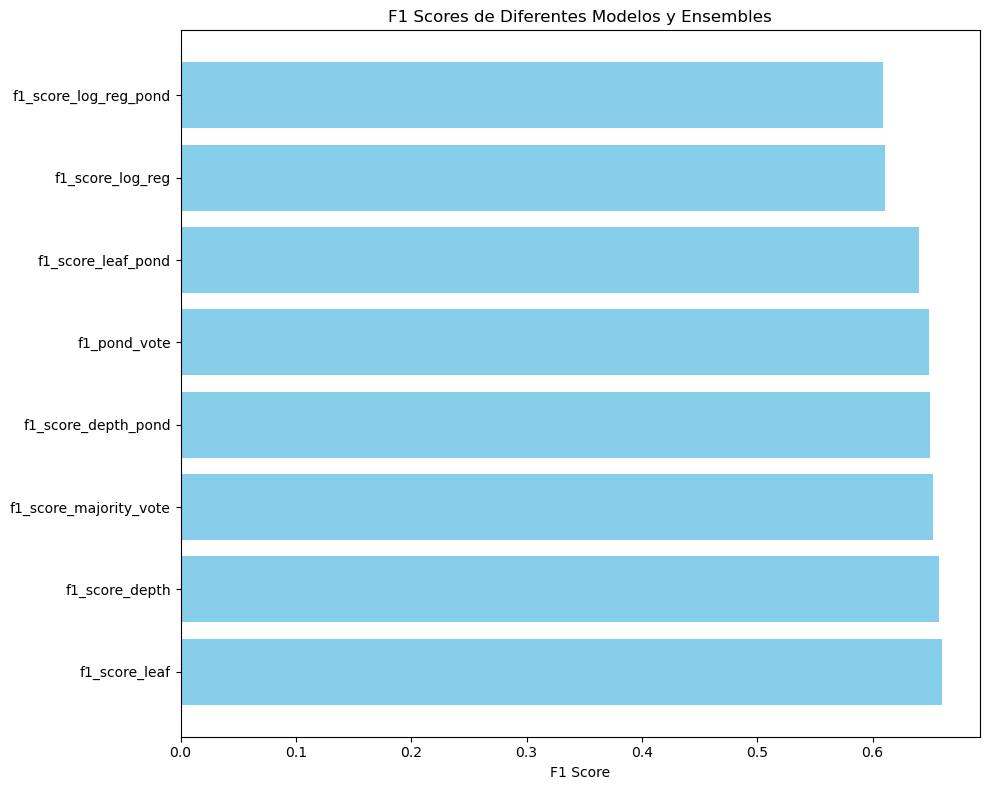

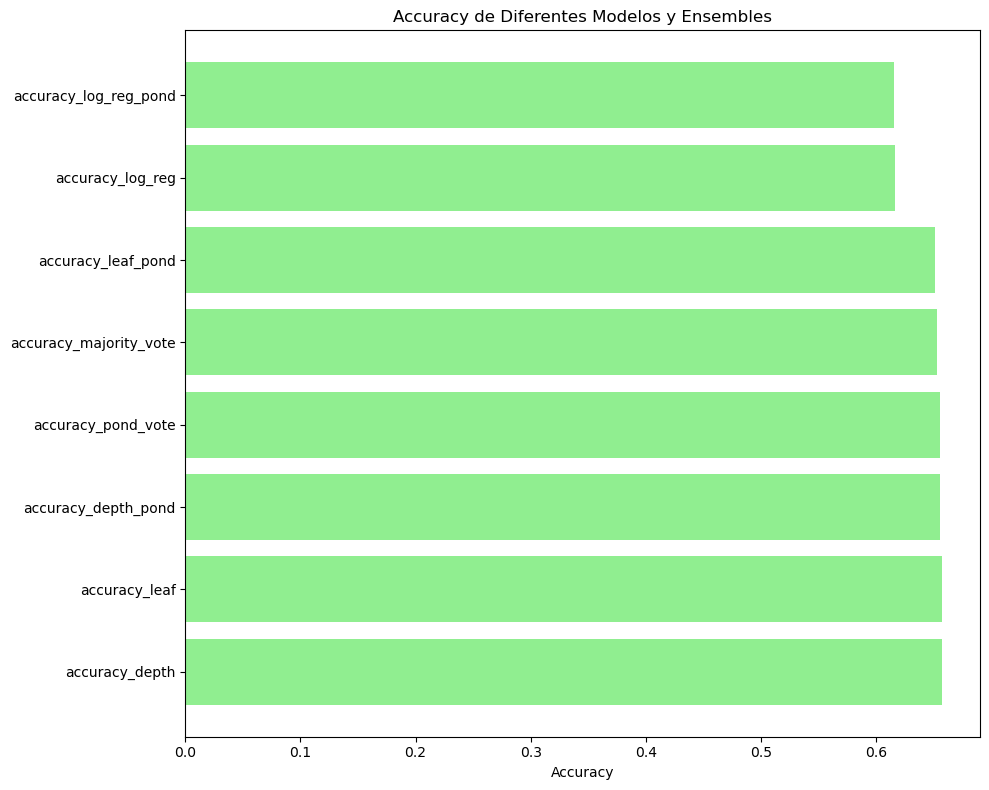

In [61]:
# Celda 9
variables = [('accuracy_depth', accuracy_depth)
,('f1_score_depth', f1_score_depth)
,('accuracy_leaf', accuracy_leaf)
,('f1_score_leaf', f1_score_leaf)
,('accuracy_log_reg', accuracy_log_reg)
,('f1_score_log_reg', f1_score_log_reg)
,('accuracy_majority_vote', accuracy_majority_vote)
,('f1_score_majority_vote', f1_score_majority_vote)
,('accuracy_depth_pond', accuracy_depth_pond)
,('f1_score_depth_pond', f1_score_depth_pond)
,('accuracy_leaf_pond', accuracy_leaf_pond)
,('f1_score_leaf_pond', f1_score_leaf_pond)
,('accuracy_log_reg_pond', accuracy_log_reg_pond)
,('f1_score_log_reg_pond', f1_score_log_reg_pond)
,('f1_pond_vote', f1_final)
,('accuracy_pond_vote', accuracy_final)]

# Separar los datos de F1 score y Accuracy
f1_scores = [(name, value) for name, value in variables if 'f1' in name]
accuracy_scores = [(name, value) for name, value in variables if 'accuracy' in name]

# Ordenar por valor para un mejor gráfico
f1_scores.sort(key=lambda x: x[1], reverse=True)
accuracy_scores.sort(key=lambda x: x[1], reverse=True)

# Graficar F1 scores
plt.figure(figsize=(10, 8))
names_f1, scores_f1 = zip(*f1_scores)
y_pos_f1 = range(len(names_f1))
plt.barh(y_pos_f1, scores_f1, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Scores de Diferentes Modelos y Ensambles')
plt.yticks(y_pos_f1, names_f1)
plt.tight_layout()
plt.show()

# Graficar Accuracy scores
plt.figure(figsize=(10, 8))
names_acc, scores_acc = zip(*accuracy_scores)
y_pos_acc = range(len(names_acc))
plt.barh(y_pos_acc, scores_acc, color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Accuracy de Diferentes Modelos y Ensambles')
plt.yticks(y_pos_acc, names_acc)
plt.tight_layout()
plt.show()

El primer gráfico muestra los F1 Scores de los diferentes modelos y ensambles evaluados. Se puede observar la variación en el rendimiento según la métrica F1, El segundo gráfico presenta la Accuracy de los mismos modelos y ensambles. Este ofrece una vista general de la capacidad de los modelos para predecir correctamente tanto las instancias positivas como negativas en su conjunto

#### Análisis del Gráfico de F1 Score
* Alto Rendimiento: Los modelos y ensambles con los F1 Scores más altos tienden a ser variantes de árboles de decisión y sus ensambles, lo que sugiere que estas técnicas son particularmente efectivas para este conjunto de datos. Esto puede deberse a su habilidad para capturar relaciones no lineales y complejas entre las variables.

* Consistencia entre Modelos de Árbol: La diferencia en los F1 Scores entre los modelos basados en árboles de decisión (tanto con limitación por profundidad como por mínimo de hojas) y sus versiones con votación ponderada es relativamente pequeña, lo que indica que la introducción de pesos en la votación no cambia drásticamente el balance entre precisión y sensibilidad.

* Regresión Logística: La regresión logística, tanto en su forma pura como en el ensamble ponderado, tiende a tener los F1 Scores más bajos. Esto podría reflejar una menor capacidad para lidiar con la complejidad de las relaciones en los datos, dada su naturaleza lineal.

#### Análisis del Gráfico de Accuracy
* Rendimiento Generalmente Alto: La mayoría de los modelos y ensambles tienen una Accuracy bastante alta, lo que sugiere que son capaces de predecir correctamente una gran proporción de los casos. Sin embargo, hay diferencias notables en cómo cada modelo logra este rendimiento.

* Mejores Modelos: Los modelos de árbol de decisión y sus ensambles muestran un desempeño superior en términos de Accuracy, lo cual es consistente con lo observado en el gráfico de F1 Score. Esto sugiere que estas técnicas son robustas y versátiles para este conjunto de datos.

* Impacto de la Votación Ponderada: Los resultados del ensamble final con votación ponderada muestran que esta técnica puede alcanzar o superar el rendimiento de los modelos individuales. Esto destaca la eficacia de combinar las predicciones de múltiples modelos, asignando más peso a aquellos con mejor desempeño histórico.

#### Conclusiones Generales
* Eficacia de los Árboles de Decisión: Tanto los árboles de decisión individuales como los ensambles basados en estos modelos tienden a ofrecer el mejor equilibrio entre precisión y sensibilidad, así como la mayor Accuracy, lo que los hace adecuados para este conjunto de datos.

* Beneficios de la Votación Ponderada: La votación ponderada, al considerar el rendimiento histórico de cada modelo, puede mejorar el rendimiento general del ensamble, aunque el efecto es relativamente modesto. Esto sugiere que es una técnica valiosa para optimizar el rendimiento del ensamble, especialmente en conjuntos de datos donde diferentes modelos capturan aspectos complementarios de los datos.